# Assignment 0
This assignment was conducted in PlanetaryComputer using the data folder which is stored there. Therefore it is not possible to run the assignment, but you can see the statistics of my data down below. 

In [1]:
import rasterio
import glob
import numpy as np
import os
import rasterio
import matplotlib.pyplot as plt
import torchgeo

## Prompt 1
Because I have different data, I cannot show the exact same metadata and statistics as in the assignment notebook. But I have tried my best to show as much information to give a good overview about my data. Let me know if someehting is unclear or statistics are missing.

In [5]:
data_pathnames = []
for file in os.listdir('../data/'):
    if file.endswith(".tiff"):
        data_pathnames.append(os.path.join("../data/", file))

In [6]:
print("Number of datacubes: " + str(len(data_pathnames)))

for path in data_pathnames:
    with rasterio.open(path, 'r') as src:
        print("Metadata of the first tiff datacube:")
        print(src.meta)
        arr = src.read()
        print("Number of dimensions:")
        print(len(arr))
        break

Number of datacubes: 41
Metadata of the first tiff datacube:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1096, 'height': 1096, 'count': 8, 'crs': CRS.from_epsg(32607), 'transform': Affine(9.984079954284827, 0.0, 572106.124477638,
       0.0, -9.984079954284827, 7727145.191541189)}
Number of dimensions:
8


There are 8 dimensions in the datacube: the label mask (binary), 6 sentinel bands and the elevation layer. However, only 4 of the 6 sentinel bands are being used for the training and testing. The code is plotting the label mask, elevation layer and the 4 sentinel bands that are being used of the first datacube. Down below, the data sources used for the project and their origin are shown in a figure.
![data_sources](data_sources.JPG)

In [14]:
def read_sub_arrays(img, window_x, window_y):
    arr = img.read()
    x = arr.shape[1]
    y = arr.shape[2]
    
    sub_arrs = []
    for i in range(x // window_x):
        for j in range(y // window_y):
            sub_arrs.append(arr[:, (i * window_x):(i * window_x + window_x), (j * window_y) : (j * window_y + window_y)])
            
    return sub_arrs


def create_training_arrays(dataset, window):
    subs = read_sub_arrays(dataset, window, window)
    out = []
    
    for sub in subs:
        arr = np.zeros((sub.shape[0]-2, sub.shape[1], sub.shape[2]))

        # Polygons
        arr[0] = sub[0]
        # Slope
        arr[1] = sub[1]
        # B02
        arr[2] = sub[3]
        # B03
        arr[3] = sub[4]
        # B04
        arr[4] = sub[5]
        # B08
        arr[5] = sub[6] 
        
        out.append(arr)
        
    return out

In [15]:
window = 64
data = []
count = 0
for img in data_pathnames:
    with rasterio.open(img, 'r') as src:
        count += len(create_training_arrays(src, window))
        data.extend(create_training_arrays(src, window))

In [16]:
print(np.array(data).shape)

(9801, 6, 64, 64)


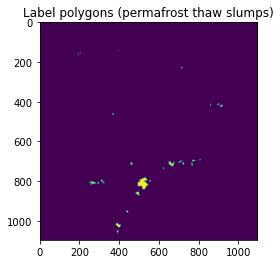

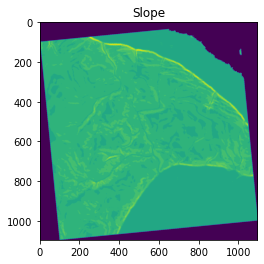

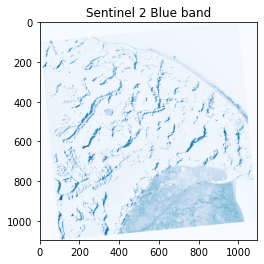

(1096, 1096)


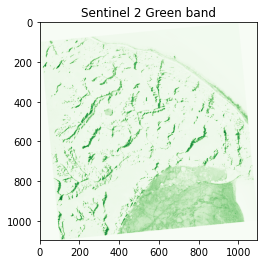

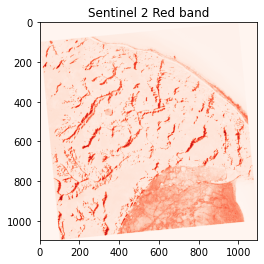

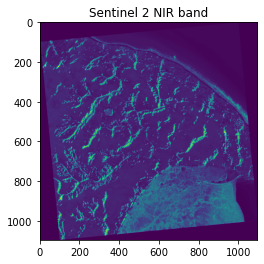

In [8]:
for path in data_pathnames:
    with rasterio.open(path, 'r') as src:
        arr = src.read()
        
        # Label
        plt.imshow(arr[0])
        plt.title("Label polygons (permafrost thaw slumps)")
        plt.savefig('label_example.jpg')
        plt.show()
        
        # Slope
        plt.imshow(arr[1])
        plt.title("Slope")
        plt.savefig('slope_example.jpg')
        plt.show()
        
        # Blue band
        plt.imshow(arr[3], cmap='Blues')
        plt.title("Sentinel 2 Blue band")
        plt.savefig('blue_example.jpg')
        plt.show()
        
        # Green band
        plt.imshow(arr[4], cmap='Greens')
        print(arr[4].shape)
        plt.title("Sentinel 2 Green band")
        plt.savefig('green_example.jpg')
        plt.show()
        
        # Red band
        plt.imshow(arr[5], cmap='Reds')
        plt.title("Sentinel 2 Red band")
        plt.savefig('red_example.jpg')
        plt.show()
        
        # NIR band (near-infrared)
        plt.imshow(arr[5])
        plt.title("Sentinel 2 NIR band")
        plt.savefig('nir_example.jpg')
        plt.show()
        
        break